# Telco Customer Churn Reduction

# 1. Planning

### Describe the project and goals.

<b>Objective/Goals:</b>
- Find the drivers for customer churn at Telco.
- Construct a machine learning (ML) classification model that accurately predicts customer churn.
- Create repeateable process modules.
- Document your process to be presented and read like a report.
- Answer questions about your code, process, and findings.

### Task out how you will work through the pipeline.

<b>Data Science Pipeline:</b>
1. Planning
2. Acquisition
3. Preparation
4. Exploration
5. Modeling 
6. Delivery 

### Incluce a data dictionary.

<b>customer_id:</b>             An alpha-number number used to identify customer 

<b>gender:</b>                  Labels customer male or female 

<b>is_senior_citizen:</b>       Labels customer senior or not senior 

<b>partner:</b>                 Labels customer with or without partner	  

<b>dependents:</b>              Labels customer with or wihtout dependents	

<b>contract_type:</b>           Month-to-month, 1-year, or 2-year contract	

<b>payment_type:</b>            Electronic, Mailled Check, or Bank transfer payment	

<b>monthly_charges:</b>         Amount of monthly charges	

<b>total_charges:</b>           Amount of total charges	

<b>churn:</b>                   Yes/No rate at which customers leave company	

<b>tenure:</b>                  Number of months customer has been with company	

<b>is_female:</b>               T/F whether female or not female	

<b>has_churned:</b>             T/F whether churned or not churned	

<b>has_phone:</b>               T/F whether has phone or does not have phone	

<b>has_internet:</b>            T/F whether has internet or does not have internet	

<b>has_phone_and_internet:</b>  T/F whether has phone and internet service or not

<b>start_date:</b>              Date when individual become customer with company      

<b>phone_type:</b>              No phone service, one-line, two or more lines	

<b>internet_type:</b>           No internet service, DSL, or fiber optic

### Clearly state your starting hypotheses.

- The largest source of churn is coming from month-to-month contracts because of increasing monthly charges.
- Specifically, the phone and internet bundle customers are churning the most.

### Project Specifications

- Why are our customers churning?
- Are there features that indicate a higher propensity to churn?
- What can be done to reduce churn in those targets customer segments?

# 2. Acquisition

- Run acquire.py
- Summarize data
- Plot distributions of individual variables 
- Split data into train, test, validate

In [1]:
import acquire
import prepare

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = acquire.get_telco_data()

In [3]:
df.head()

,customer_id,gender,senior,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,contract_type.1,phone_type,internet_type,service_type
0,9995-HOTOH,Male,0,Yes,Yes,0,1,2,Electronic check,59.00,...,False,False,False,True,False,3,2 Year,No Phone Service,DSL,Internet Only
1,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,...,False,False,True,True,True,3,2 Year,One Line,DSL,Phone+Internet
2,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,...,False,False,True,True,True,0,Month-to-Month,One Line,DSL,Phone+Internet
3,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,...,False,True,True,True,True,1,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet
4,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,...,True,False,True,True,True,0,1 Year,One Line,DSL,Phone+Internet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   senior                  7043 non-null   int64  
 3   partner                 7043 non-null   object 
 4   dependents              7043 non-null   object 
 5   phone_service           7043 non-null   int64  
 6   internet_service        7043 non-null   int64  
 7   contract_type           7043 non-null   int64  
 8   payment_type            7043 non-null   object 
 9   monthly_charges         7043 non-null   float64
 10  total_charges           7032 non-null   object 
 11  churn                   7043 non-null   object 
 12  tenure                  7043 non-null   int64  
 13  is_female               7043 non-null   bool   
 14  has_churned             7043 non-null   

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
phone_service,7043.0,1.325004,0.642730,0.00,1.0,1.00,2.00,2.00
internet_service,7043.0,1.222916,0.778877,0.00,1.0,1.00,2.00,2.00
contract_type,7043.0,0.690473,0.833755,0.00,0.0,0.00,1.00,2.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
tenure,7043.0,32.368309,24.597021,0.00,9.0,29.00,55.00,79.00
partner_dependents,7043.0,1.082209,1.226274,0.00,0.0,1.00,2.00,3.00


In [6]:
df.isnull().sum()

customer_id                0
gender                     0
senior                     0
partner                    0
dependents                 0
phone_service              0
internet_service           0
contract_type              0
payment_type               0
monthly_charges            0
total_charges             11
churn                      0
tenure                     0
is_female                  0
has_churned                0
has_phone                  0
has_internet               0
has_phone_and_internet     0
partner_dependents         0
contract_type.1            0
phone_type                 0
internet_type              0
service_type               0
dtype: int64

# 3. Preparation

- Run prepare.py
- Explore missing values 
- Document your takeaways

In [7]:
df_1 = prepare.telco_data_prep()

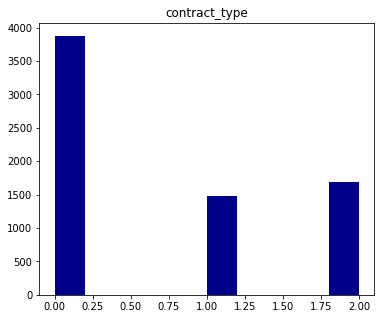

In [8]:
for col in df.columns:
    if col == "contract_type":
        plt.figure(figsize=(6,5))
        plt.hist(df[col], color='darkblue')
        plt.title(col)
        plt.show()

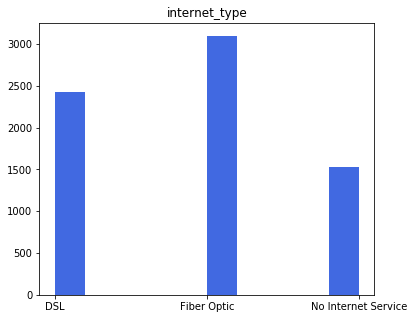

In [9]:
for col in df.columns:
    if col == "internet_type":
        plt.figure(figsize=(6,5))
        plt.hist(df[col], color='royalblue')
        plt.title(col)
        plt.show()

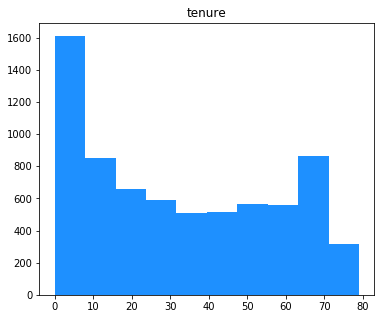

In [10]:
for col in df.columns:
    if col == "tenure":
        plt.figure(figsize=(6,5))
        plt.hist(df[col], color='dodgerblue')
        plt.title(col)
        plt.show()

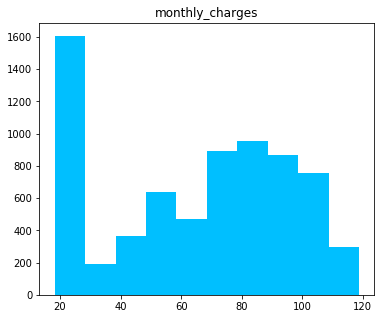

In [11]:
for col in df.columns:
    if col == "monthly_charges":
        plt.figure(figsize=(6,5))
        plt.hist(df[col], color='deepskyblue')
        plt.title(col)
        plt.show()

In [31]:
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)

NameError: name 'train_test_split' is not defined

# 4. Exploration 

- Figure out churn drivers 
- Document hypotheses
- Set alpha before running test
- Plot rate of churn 
- Explore only the train data set
- Create models
- Summarize conclusions

In [15]:
df = get_telco_data()

In [16]:
df.churn.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

In [38]:
# Run a t-test to test hypothesis

alpha = .05

# 5. Modeling

- Establish a baseline accuracy to determine if having a model is better than no model and train 
- Compare at least 3 different models

### Decision Tree

In [39]:
# Decision Tree Model
train, validate, test = get_telco_data()

ValueError: too many values to unpack (expected 3)

### Random Forest

In [40]:
# Random Forrest Model
train, validate, test = get_telco_data()

ValueError: too many values to unpack (expected 3)

### KNN

In [ ]:
# KNN Model
train, validate, test = get_telco_data()

# 6. Delivery

Draw Conclusions
- Summarize your findings

- Key takeaways and next steps